NUMPY_day03_hw_임소영

In [1037]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
from scipy import integrate
import warnings

## 문제1 : 데이터셋 불러오기 및 기본정보 확인

In [1038]:
# 1-1
file = 'iris.csv'
data = pd.read_csv(file, encoding='cp949')
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [1039]:
# 1-2
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [1040]:
data.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

In [1041]:
# 1-3
var = data['variety']
var.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [1042]:
var.value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

## 문제 2: 데이터 시각화 및 탐색

#### 2-1) 붓꽃 데이터셋에서 각 특성 간의 산점도(scatter plot)를 그리되, 각 클래스별로 다른 색상을 사용하여 시각화하시오

In [1043]:
Sertosa = data.iloc[0:50]
Sertosa.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
45,4.8,3.0,1.4,0.3,Setosa
46,5.1,3.8,1.6,0.2,Setosa
47,4.6,3.2,1.4,0.2,Setosa
48,5.3,3.7,1.5,0.2,Setosa
49,5.0,3.3,1.4,0.2,Setosa


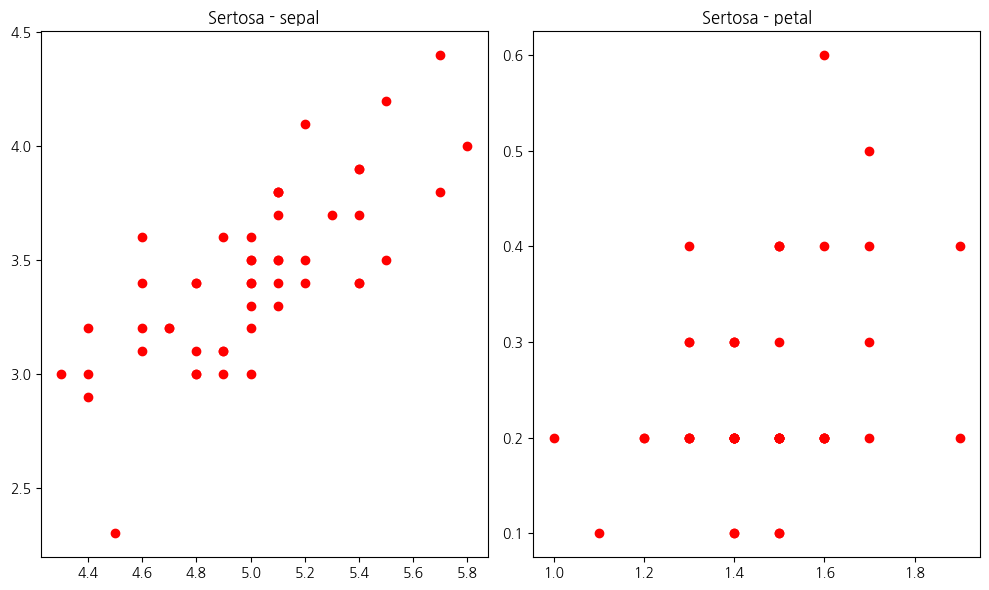

In [1044]:
def draw_box(subp, insult_df1, insult_df2, c, label_name):
    #num = 1
    ax = fig.add_subplot(subp)  
    #insult_df = Sertosa['sepal.length']
    #label_name = 'Sertosa - sepal.length'
    ax.scatter(insult_df1, insult_df2, color = c)
    plt.title(label_name)
    
fig = plt.figure(figsize=(10, 6))
draw_box(121, Sertosa['sepal.length'], Sertosa['sepal.width'],'red', 'Sertosa - sepal')
draw_box(122, Sertosa['petal.length'], Sertosa['petal.width'],'red', 'Sertosa - petal')
plt.tight_layout()
plt.show()

In [1045]:
Versicolor = data.iloc[50:100]
Versicolor.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
95,5.7,3.0,4.2,1.2,Versicolor
96,5.7,2.9,4.2,1.3,Versicolor
97,6.2,2.9,4.3,1.3,Versicolor
98,5.1,2.5,3.0,1.1,Versicolor
99,5.7,2.8,4.1,1.3,Versicolor


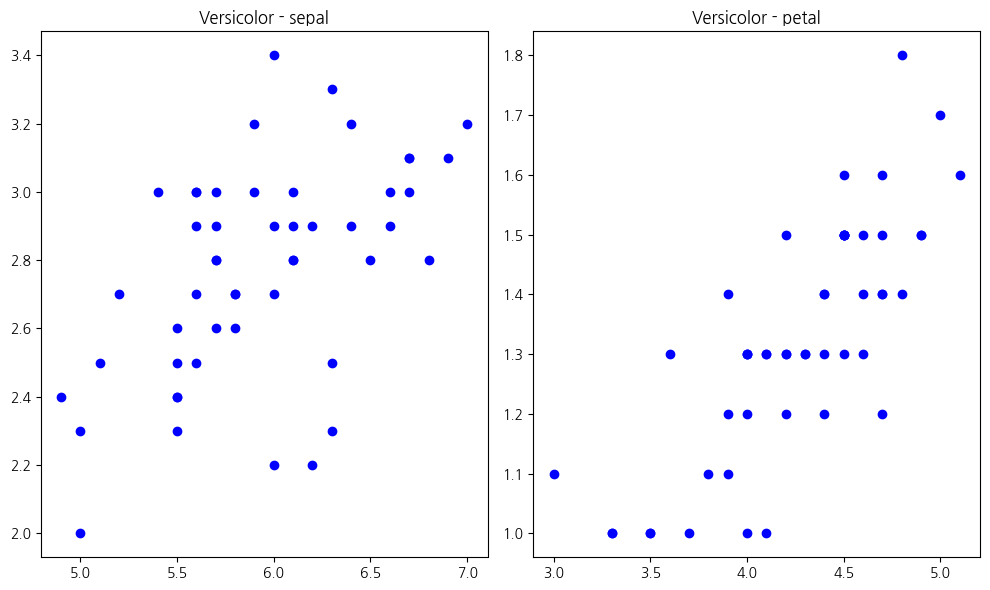

In [1046]:
fig = plt.figure(figsize=(10, 6))
draw_box(121, Versicolor['sepal.length'], Versicolor['sepal.width'],'blue', 'Versicolor - sepal')
draw_box(122, Versicolor['petal.length'], Versicolor['petal.width'],'blue', 'Versicolor - petal')
plt.tight_layout()
plt.show()

In [1047]:
Virginica = data.iloc[100:]
Virginica.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
100,6.3,3.3,6.0,2.5,Virginica
101,5.8,2.7,5.1,1.9,Virginica
102,7.1,3.0,5.9,2.1,Virginica
103,6.3,2.9,5.6,1.8,Virginica
104,6.5,3.0,5.8,2.2,Virginica


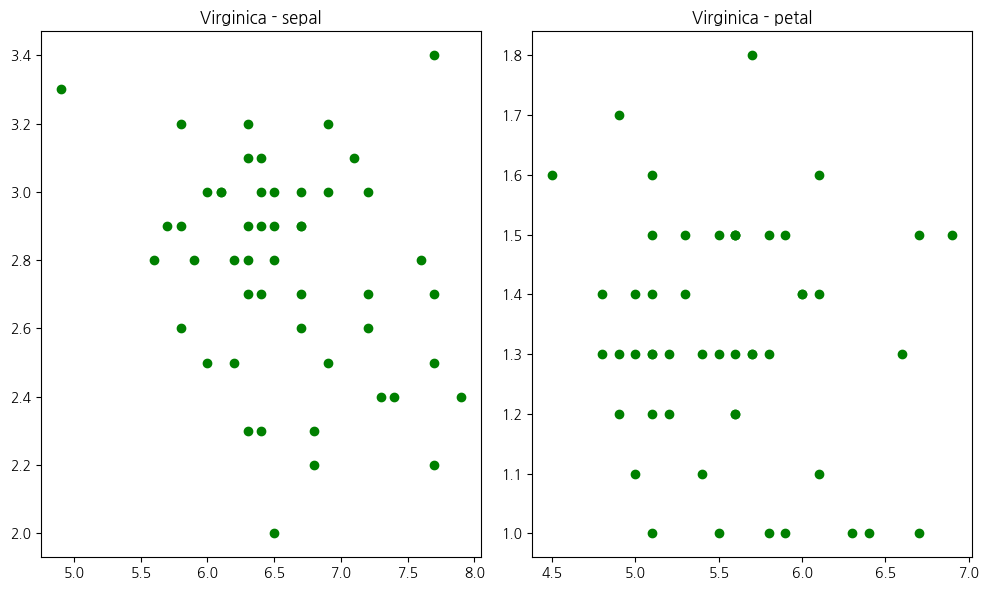

In [1048]:
fig = plt.figure(figsize=(10, 6))
draw_box(121, Virginica['sepal.length'], Versicolor['sepal.width'],'green', 'Virginica - sepal')
draw_box(122, Virginica['petal.length'], Versicolor['petal.width'],'green', 'Virginica - petal')
plt.tight_layout()
plt.show()

#### 2-2) 꽃받침의 길이(Sepal Length)와 꽃받침의 너비(Sepal Width)의 관계를 시각화하고, 각 클래스별로 구분하여 출력하시오

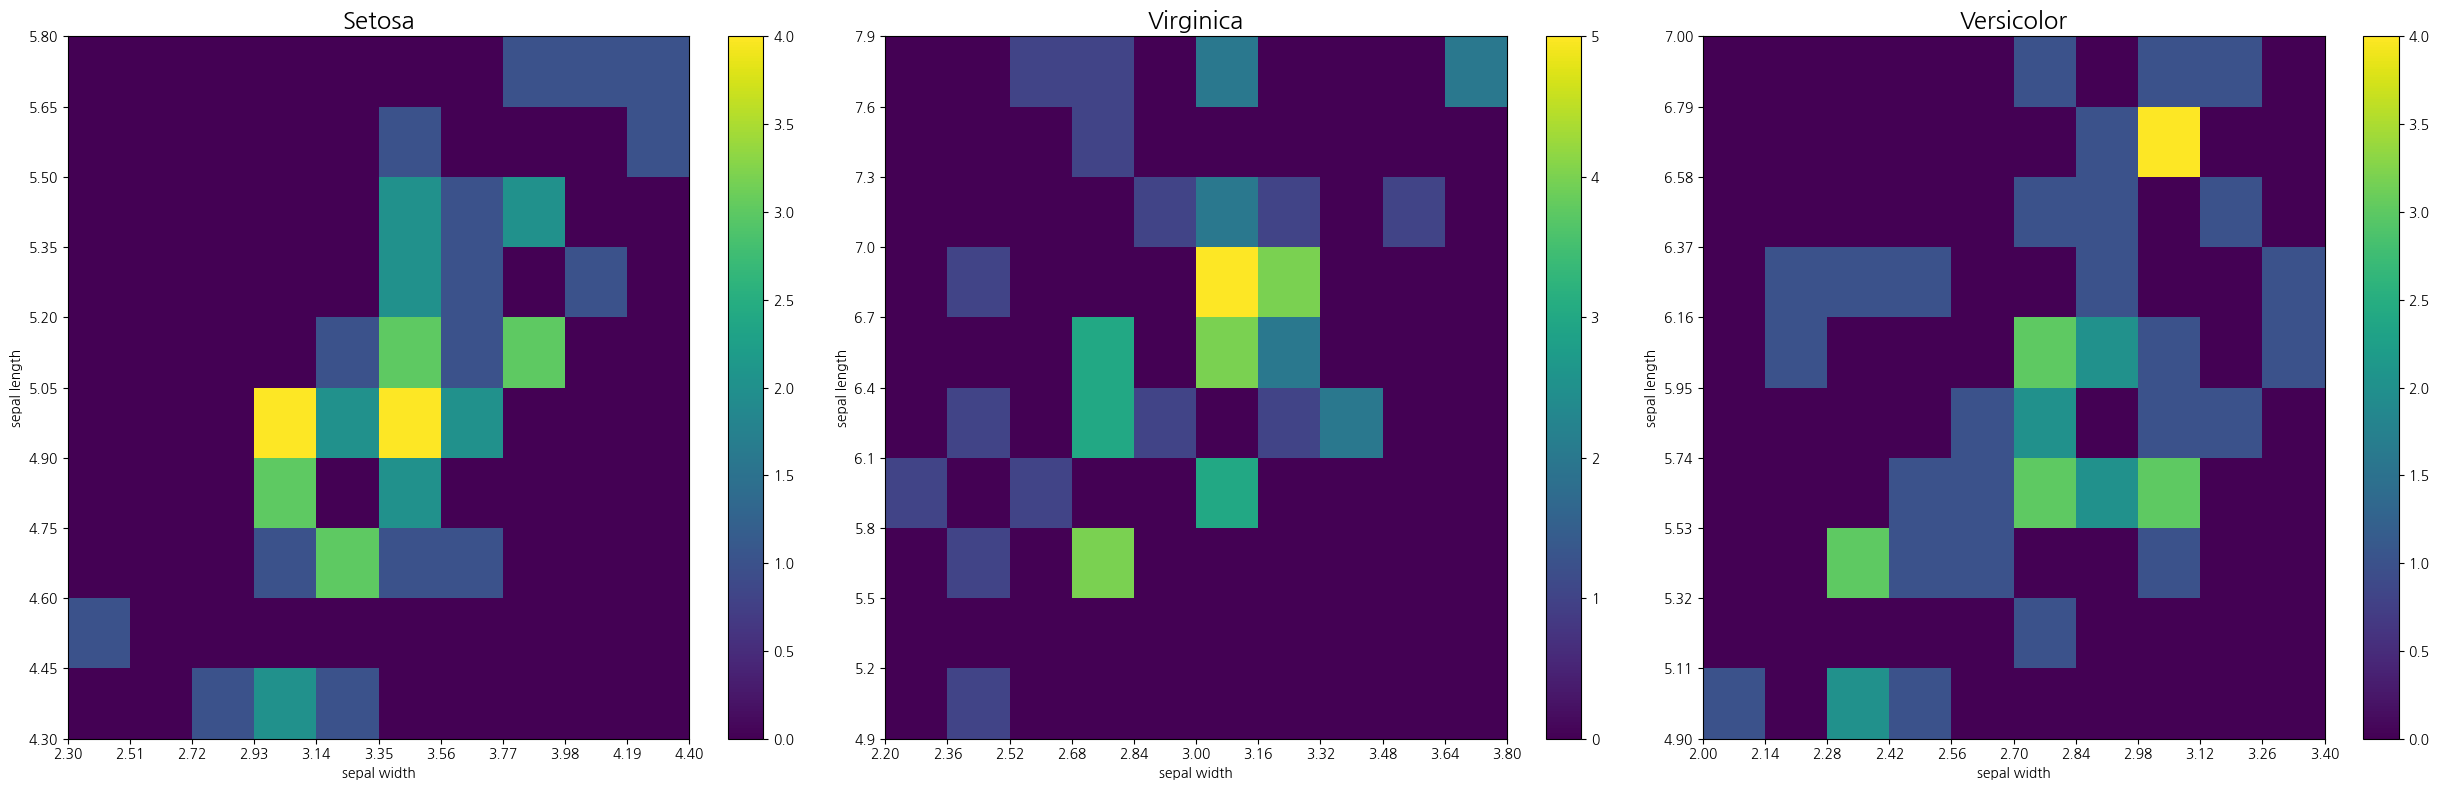

In [1049]:
def draw_hist2d(plotnum, data1, data2, title_word): 
    ax = fig.add_subplot(plotnum)
    c = ax.hist2d(data1, data2, bins=[10,10], range = [(data1.min(), data1.max()), (data2.min(), data2.max())])
    ax.set_xlabel('sepal width')
    ax.set_ylabel('sepal length')
    # print(c[0])
    # print(c[1])
    # print(c[2])
    # print(c[3])
    ax.set_xticks(c[1])
    ax.set_yticks(c[2])
    fig.colorbar(c[3], ax = ax)
    plt.title(title_word, fontsize = 'xx-large')

x1 = Sertosa['sepal.width']
y1 = Sertosa['sepal.length'] 
x2 = Virginica['sepal.width']
y2 = Virginica['sepal.length']
x3 = Versicolor['sepal.width']
y3 = Versicolor['sepal.length']

fig = plt.figure(figsize = (25, 8))

draw_hist2d(131, x1, y1, 'Setosa')
draw_hist2d(132, x2, y2, 'Virginica')
draw_hist2d(133, x3, y3, 'Versicolor')

plt.tight_layout()
plt.show()

In [1050]:
def draw_graph(plotnum, insert_data, title_word): 
    ax = fig.add_subplot(plotnum)
    c = ax.pcolor(insert_data)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    fig.colorbar(c, ax=ax)
    plt.title(title_word, fontsize = 'xx-large')

'''
sepal_data = Sertosa[['sepal.width', 'sepal.length']]
sepal_data = Virginica[['sepal.width', 'sepal.length']]
sepal_data = Versicolor[['sepal.width', 'sepal.length']]

fig = plt.figure(figsize = (20, 8))
draw_graph(131, sepal_data, 'setosa')
draw_graph(132, sepal_data, 'virginica')
draw_graph(133, sepal_data, 'versicolor')
plt.tight_layout()
plt.show()
'''

"\nsepal_data = Sertosa[['sepal.width', 'sepal.length']]\nsepal_data = Virginica[['sepal.width', 'sepal.length']]\nsepal_data = Versicolor[['sepal.width', 'sepal.length']]\n\nfig = plt.figure(figsize = (20, 8))\ndraw_graph(131, sepal_data, 'setosa')\ndraw_graph(132, sepal_data, 'virginica')\ndraw_graph(133, sepal_data, 'versicolor')\nplt.tight_layout()\nplt.show()\n"

## 문제 3 : 연속확률변수 및 연속확률분포 계산

#### 3-1) 꽃잎의 길이(Petal Length)를 연속확률변수로 가정할 때, 이 확률변수의 평균과 분산을 계산하시오

In [1051]:
d = Sertosa['petal.length']
print("Setosa's petal length")
print(f"평균 : {d.mean().round(3)}")
print(f"분산 : {d.var()}")

Setosa's petal length
평균 : 1.462
분산 : 0.030159183673469397


In [1052]:
d = Virginica['petal.length']
print("Virginica's petal length")
print(f"평균 : {d.mean().round(3)}")
print(f"분산 : {d.var()}")

Virginica's petal length
평균 : 5.552
분산 : 0.304587755102041


In [1053]:
d = Versicolor['petal.length']
print("Versicolor's petal length")
print(f"평균 : {d.mean().round(3)}")
print(f"분산 : {d.var()}")

Versicolor's petal length
평균 : 4.26
분산 : 0.22081632653061237


#### 3-2) 꽃잎의 너비(Petal Width)를 연속확률변수로 가정할 때, 이 확률변수의 확률밀도함수(probability density function, PDF)를 계산하고 그래프로 시각화하시오

{0.2: 0.58, 0.4: 0.14, 0.3: 0.14, 0.1: 0.1, 0.5: 0.02, 0.6: 0.02}


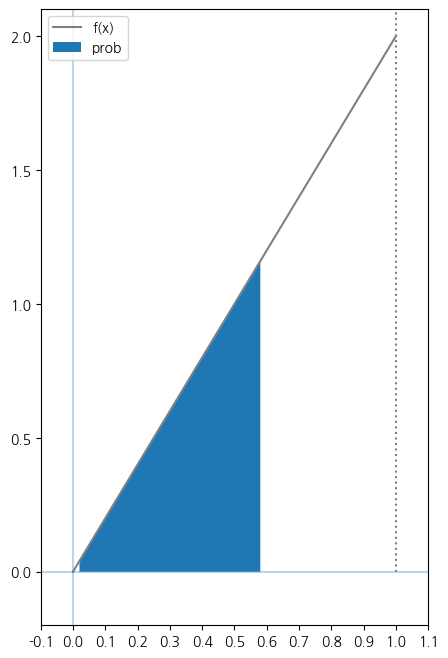

확률밀도함수: 0.33599999999999997


In [1054]:
def hamsu1():
    data_before = Sertosa['petal.width']
    data_sort = data_before.sort_values()
    #data_sort
    
    result = data_sort.value_counts()
    index_list = []
    for i in range(len(result.index)):
        index_list.append(float(result.index[i]))
        #print(result.index[i])
    #print(index_list)
    
    my_dict = {}
    total_count = 0
    for i in range(data_before.shape[0]):
        value = data_before[i]
        total_count += 1
        for idx in index_list:
            if value == idx:
                if idx not in my_dict.keys():
                    my_dict[idx] = 1
                else :
                    my_dict[idx] += 1
    #print(my_dict)
    #print(total_count)
    
    my_pct = {}
    for k, v in my_dict.items():
        rst = v / total_count
        my_pct[k] = round(rst, 2)
    print(my_pct)
    
    sr_data = pd.Series(my_pct)
    sr_data
    
    d1 = sr_data
    min_value = min(d1)
    max_value = max(d1)
    
    #print(min_value, max_value)
    
    x_range = np.array([0,1])
    def f(x):
        if x_range[0] <= x <= x_range[1]:
            return 2 * x
        else:
            return 0
        
    X = [x_range, f]
    
    xs = np.linspace(x_range[0], x_range[1], 100)
    fig = plt.figure(figsize=(5, 8))
    ax = fig.add_subplot(111)
    
    ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
    ax.hlines(0, -0.2, 1.2, alpha=0.3)
    ax.vlines(0, -0.2, 2.2, alpha=0.3)
    ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')
    
    # 최소값부터 최대값까지 x좌표를 준비
    xs = np.linspace(min_value, max_value, 100)
    # xs의 범위로 f(x)와 x축으로 둘러싸인 영역을 진하게 칠함
    ax.fill_between(xs, [f(x) for x in xs], label='prob')
    
    ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.2, 2.1)
    ax.legend()
    plt.show()
    
    result = integrate.quad(f, min_value, max_value)
    print(f"확률밀도함수: {result[0]}")
hamsu1()

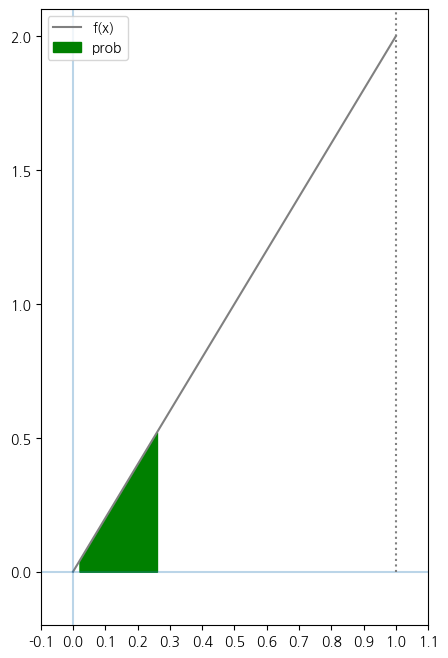

확률밀도함수: 0.06720000000000001


In [1055]:
def hamsu2():
    data_before = Versicolor['petal.width']
    data_sort = data_before.sort_values()
    #data_sort
    
    result = data_sort.value_counts()
    index_list = []
    for i in range(len(result.index)):
        index_list.append(float(result.index[i]))
        #print(result.index[i])
    #print(index_list)
    
    my_dict = {}
    total_count = 0
    for i in range(data_before.shape[0]):
        value = data_before[50+i]
        #print(value)
        total_count += 1
        for idx in index_list:
            if value == idx:
                if idx not in my_dict.keys():
                    my_dict[idx] = 1
                else :
                    my_dict[idx] += 1
    #print(my_dict)
    #print(total_count)
    
    my_pct = {}
    for k, v in my_dict.items():
        rst = v / total_count
        my_pct[k] = round(rst, 2)
    #print(my_pct)
    
    sr_data = pd.Series(my_pct)
    #sr_data
    
    d1 = sr_data
    min_value = min(d1)
    max_value = max(d1)
    
    #print(min_value, max_value)
    
    x_range = np.array([0,1])
    def f(x):
        if x_range[0] <= x <= x_range[1]:
            return 2 * x
        else:
            return 0
        
    X = [x_range, f]
    
    xs = np.linspace(x_range[0], x_range[1], 100)
    fig = plt.figure(figsize=(5, 8))
    ax = fig.add_subplot(111)
    
    ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
    ax.hlines(0, -0.2, 1.2, alpha=0.3)
    ax.vlines(0, -0.2, 2.2, alpha=0.3)
    ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')
    
    # 최소값부터 최대값까지 x좌표를 준비
    xs = np.linspace(min_value, max_value, 100)
    # xs의 범위로 f(x)와 x축으로 둘러싸인 영역을 진하게 칠함
    ax.fill_between(xs, [f(x) for x in xs], label='prob', color = 'green')
    
    ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.2, 2.1)
    ax.legend()
    plt.show()
    
    result = integrate.quad(f, min_value, max_value)
    print(f"확률밀도함수: {result[0]}")
hamsu2()

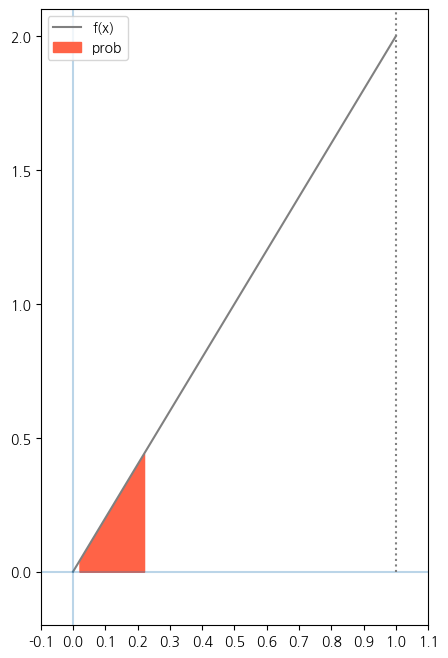

확률밀도함수: 0.048


In [1056]:
def hamsu3():
    data_before = Virginica['petal.width']
    data_sort = data_before.sort_values()
    #data_sort
    
    result = data_sort.value_counts()
    index_list = []
    for i in range(len(result.index)):
        index_list.append(float(result.index[i]))
        #print(result.index[i])
    #print(index_list)
    
    my_dict = {}
    total_count = 0
    for i in range(data_before.shape[0]):
        value = data_before[100+i]
        #print(value)
        total_count += 1
        for idx in index_list:
            if value == idx:
                if idx not in my_dict.keys():
                    my_dict[idx] = 1
                else :
                    my_dict[idx] += 1
    #print(my_dict)
    #print(total_count)
    
    my_pct = {}
    for k, v in my_dict.items():
        rst = v / total_count
        my_pct[k] = round(rst, 2)
    #print(my_pct)
    
    sr_data = pd.Series(my_pct)
    #sr_data
    
    d1 = sr_data
    min_value = min(d1)
    max_value = max(d1)
    
    #print(min_value, max_value)
    
    x_range = np.array([0,1])
    def f(x):
        if x_range[0] <= x <= x_range[1]:
            return 2 * x
        else:
            return 0
        
    X = [x_range, f]
    
    xs = np.linspace(x_range[0], x_range[1], 100)
    fig = plt.figure(figsize=(5, 8))
    ax = fig.add_subplot(111)
    
    ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
    ax.hlines(0, -0.2, 1.2, alpha=0.3)
    ax.vlines(0, -0.2, 2.2, alpha=0.3)
    ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')
    
    # 최소값부터 최대값까지 x좌표를 준비
    xs = np.linspace(min_value, max_value, 100)
    # xs의 범위로 f(x)와 x축으로 둘러싸인 영역을 진하게 칠함
    ax.fill_between(xs, [f(x) for x in xs], label='prob', color = 'tomato')
    
    ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.2, 2.1)
    ax.legend()
    plt.show()
    
    result = integrate.quad(f, min_value, max_value)
    print(f"확률밀도함수: {result[0]}")

hamsu3()

#### 3-3) 꽃잎의 길이(Petal Length)가 4cm 이상 5cm 미만일 확률을 계산하시오

In [1057]:
data_before = data['petal.length']
data_sort = data_before.sort_values()
data_sort

22     1.0
13     1.1
14     1.2
35     1.2
36     1.3
      ... 
131    6.4
105    6.6
117    6.7
122    6.7
118    6.9
Name: petal.length, Length: 150, dtype: float64

In [1058]:
result = data_sort.value_counts()
result.info

<bound method Series.info of petal.length
1.4    13
1.5    13
4.5     8
5.1     8
1.3     7
1.6     7
5.6     6
4.0     5
4.9     5
4.7     5
5.0     4
4.8     4
4.4     4
4.2     4
1.7     4
5.8     3
4.1     3
5.7     3
5.5     3
6.1     3
4.6     3
3.9     3
6.7     2
1.2     2
5.4     2
5.3     2
5.2     2
5.9     2
1.9     2
3.3     2
3.5     2
4.3     2
6.0     2
6.6     1
6.4     1
6.3     1
1.0     1
1.1     1
3.8     1
3.7     1
3.6     1
3.0     1
6.9     1
Name: count, dtype: int64>

In [1059]:
index_list = []
for i in range(len(result.index)):
    index_list.append(float(result.index[i]))
    #print(result.index[i])

print(index_list)

[1.4, 1.5, 4.5, 5.1, 1.3, 1.6, 5.6, 4.0, 4.9, 4.7, 5.0, 4.8, 4.4, 4.2, 1.7, 5.8, 4.1, 5.7, 5.5, 6.1, 4.6, 3.9, 6.7, 1.2, 5.4, 5.3, 5.2, 5.9, 1.9, 3.3, 3.5, 4.3, 6.0, 6.6, 6.4, 6.3, 1.0, 1.1, 3.8, 3.7, 3.6, 3.0, 6.9]


In [1060]:
my_dict = {}
total_count = 0
for i in range(data.shape[0]):
    value = data.iloc[i][2]
    total_count += 1
    for idx in index_list:
        if value == idx:
            if idx not in my_dict.keys():
                my_dict[idx] = 1
            else :
                my_dict[idx] += 1
        
print(my_dict)
print(total_count)

{1.4: 13, 1.3: 7, 1.5: 13, 1.7: 4, 1.6: 7, 1.1: 1, 1.2: 2, 1.0: 1, 1.9: 2, 4.7: 5, 4.5: 8, 4.9: 5, 4.0: 5, 4.6: 3, 3.3: 2, 3.9: 3, 3.5: 2, 4.2: 4, 3.6: 1, 4.4: 4, 4.1: 3, 4.8: 4, 4.3: 2, 5.0: 4, 3.8: 1, 3.7: 1, 5.1: 8, 3.0: 1, 6.0: 2, 5.9: 2, 5.6: 6, 5.8: 3, 6.6: 1, 6.3: 1, 6.1: 3, 5.3: 2, 5.5: 3, 6.7: 2, 6.9: 1, 5.7: 3, 6.4: 1, 5.4: 2, 5.2: 2}
150


In [1061]:
my_pct = {}

for k, v in my_dict.items():
    rst = v / 150
    my_pct[k] = round(rst, 2)
    
print(my_pct)

{1.4: 0.09, 1.3: 0.05, 1.5: 0.09, 1.7: 0.03, 1.6: 0.05, 1.1: 0.01, 1.2: 0.01, 1.0: 0.01, 1.9: 0.01, 4.7: 0.03, 4.5: 0.05, 4.9: 0.03, 4.0: 0.03, 4.6: 0.02, 3.3: 0.01, 3.9: 0.02, 3.5: 0.01, 4.2: 0.03, 3.6: 0.01, 4.4: 0.03, 4.1: 0.02, 4.8: 0.03, 4.3: 0.01, 5.0: 0.03, 3.8: 0.01, 3.7: 0.01, 5.1: 0.05, 3.0: 0.01, 6.0: 0.01, 5.9: 0.01, 5.6: 0.04, 5.8: 0.02, 6.6: 0.01, 6.3: 0.01, 6.1: 0.02, 5.3: 0.01, 5.5: 0.02, 6.7: 0.01, 6.9: 0.01, 5.7: 0.02, 6.4: 0.01, 5.4: 0.01, 5.2: 0.01}


In [1062]:
total_result = 0
for k, v in my_pct.items():
    if 4 <= k < 5:
        #print(k)
        #print(v)
        total_result += v
        #print('-'*30)
print(f"꽃잎의 길이(Petal Length)가 4cm 이상 5cm 미만일 확률: {total_result}")

꽃잎의 길이(Petal Length)가 4cm 이상 5cm 미만일 확률: 0.28
